<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 3: Infinite Horizon MDPs (40 points)  </font></h1>



## Requirements
Make sure that the file gridworld.py is in the same directory as your notebook.


## Deadline
11:59 pm Oct 12th, 2022 

##  Content
In this assignment we will investigate two algorithms for infinite-horizon MDPs. Namely:

* Policy Evaluation & Value Iteration (GridWorld)
* Policy Iteration (Machine-repair problem of the homework)


In [1]:
# Imports
import numpy as np

## Problem 1. Policy Evaluation & Value Iteration (20 points)



### 1.1 The GridWorld


**(Simple) Tabular Grid-World**

You can visualize the grid worlds we will train our agents on, by running the cells below.
`S` indicates the start state and `G` indicates the goal.  

At every step, the agent can choose one of the four actions: "up","right","down","left", moving to the next tile in that direction. If the agent chooses to move into a wall, he "bumps" into it and remains in the same place.

Rewards are: `-5` for bumping into a wall, `+10` for reaching the goal, and `0` otherwise.  The episode ends when the agent reaches the goal, and otherwise continues.  


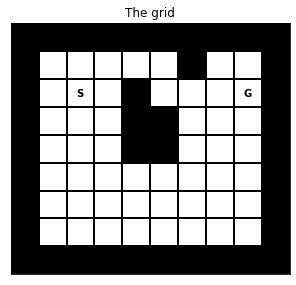

In [2]:
from gridworld import GridWorld

gw = GridWorld()
gw.plot_grid(plot_title='The grid')

### Task 1.1.1 Answer the following questions [3 Points]

Under a discounted setting $\gamma<1$:
1. Describe what is an optimal policy for this problem
2. Is the optimal policy unique? Justify your answer

3. How do your answers change for an undiscounted setting $\gamma=1$?

**Your answer**

### 1.1.2 States and state values
Excluding the wall around the grid, there are 56 tiles (INCLUDING obstacles inside the grid), and they correspond to 56 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 55 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

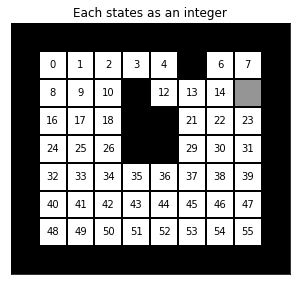

In [3]:
gw.plot_state_values(np.arange(56),value_format="{:d}",plot_title='Each states as an integer')

### 1.1.3 Taking actions
Use `GridWorld.step(action)` to take an action, and use `GridWorld.reset()` to restart an episode.

`action` is an integer from 0 to 3, denoting

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left" 


The method `Gridworld.step()` returns a tuple `r, done, next_s` where `r` is the stage-reward, `done` is a boolean indicating episode termination and `next_s` is the next state.


In [4]:
# Reset the state to 'S'
gw.reset()

# Get the current state
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

# Take a random action
action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)
print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

# Reset to state 'S'
gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episode")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



The current state is 9, which corresponds to tile position (1, 1)

Take action 3, get reward 0.0, move to state 8
Now the current state is 8, which corresponds to tile position (1, 0)

Reset episode
Now the current state is 9, which corresponds to tile position (1, 1)


### 1.1.4 Plotting Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (56,)-numpy array whose entries are all integers in (0-3)

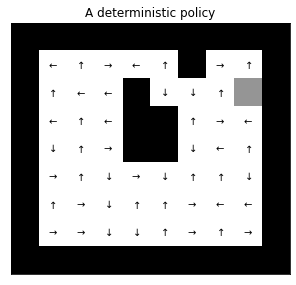

In [5]:
gw.plot_policy(np.random.randint(4,size=(56,)),plot_title='A deterministic policy')

### 1.2 Policy Evaluation

Recall that the value function $v_\pi(s)$ of a fixed policy $\pi(s)$ can be iteratively computed via Policy Evaluation (See Sutton&Barto Section 4.1), the iteration is given by $$v_{k+1}(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{k}(s)]\,,$$ which can be written as 
$$
    v_{k+1}(s)=\sum_{a}\pi(a|s)\left[\mathbb{E}_\pi[r|s,a]+\gamma\sum_{s'}p(s'|s,a)v_k(s')\right]\,.
$$
If we write the value function $v_{k+1},v_k$ as vectors, then we have
$$
    v_{k+1} = \sum_{a}\pi(a|s)\left[R_\pi(a)+\gamma P_\pi(a)v_{k}\right]\,.
$$
where $R_\pi(a)$ is the expected reward under action $a$ and  $P_\pi(a)$ is the transition probability matrix under action $a$. 

With this we can find the value function $v_\pi$ of random policy $\pi$ when discount is 0.9, the code is shown below



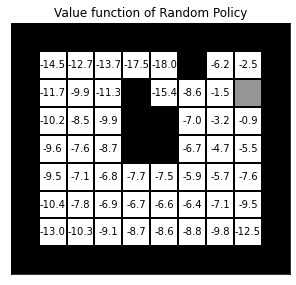

In [6]:
pi_a = [0.25,0.25,0.25,0.25] # Uniformly-random policy (takes each action with equal probability, for all states) 

gamma = 0.9
max_it = 1000  # Maximum number of iterations
tol = 1e-5  # Tolerance
v = np.zeros((56,))

for i in range(max_it):
    value_temp = np.zeros((56,))
    for action in range(4):
        reward, tran_prob = gw.transition(action)
        value_temp = value_temp + pi_a[action]*(reward+gamma* np.matmul(tran_prob,v))

    if np.linalg.norm(value_temp-v)<tol:  # Termination condition
        break
    else:
        v = value_temp
        

gw.plot_state_values(v,value_format="{:.1f}",plot_title='Value function of Random Policy')

### Task 1.2.1 [Coding, 7 points]
Compute and plot the greedy policy corresponding to the value function above.

Hint: First compute the Q values from `v` above.

In [7]:
# Answer: Your code here

## 1.3 Value Iteration



### Task 1.3.1 [Coding, 10 points]

Implement Value Iteration Algorithm [Sutton&Barto Section 4.4] to find the optimal policy of this gridworld, and plot its value function.



In [8]:
# Value Iteration Algorithm

def value_iteration(gridworld, gamma):
# input:  gridworld, (GridWorld class) gridworld class describing the environment
#         gamma,     (float 0-1) discount of the return
# output: optim value,  (1d numpy array, float) optimal value function 
#         optim_policy, (1d numpy array, int {0,1,2,3}) optimal policy

#write your code here

    return optim_value, optim_policy

In [9]:
# check your result here
optim_value, optim_policy = value_iteration(gw, 0.9)
gw.plot_state_values(optim_value,value_format="{:.1f}",plot_title='Value function of Value Iteration')
gw.plot_policy(optim_policy,plot_title='Greedy Policy of Value Iteration')

NameError: name 'optim_value' is not defined

## Problem 2. Policy Iteration (HW2: P3) [20 points]

#### Suppose we have a machine that is either running or is broken down.  If it runs through-out one week, it makes a gross profit of \\$120. If it fails during the week, gross profit is zero. If it is running at the start of the week and we perform preventive maintenance,the probability that it will fail during the week is 0.4.  If we do not perform such maintenance, the probability of failure is 0.7. However, maintenance will cost \\$20.  When the machine is broken down at the start of the week (it failed during the week before),it may either be repaired at a cost of \\$60, in which case it will fail during the week with a probability of 0.4, or it may be replaced at a cost of \\$120 by a new machinethat is guaranteed to run through its first week of operation.

### Task 2.1 [Coding, 15 points]

Implement Policy Iteration Algorithm [Sutton&Barto Section 4.3] to find the optimal policy of this problem respectively for $\gamma = 0.9$ and $\gamma = 0.4$

In [ ]:
# Write auxiliary functions here

In [ ]:
def policy_iter(gamma,max_it,tol):
# input:  gamma,     (float) discount of the return
#         max_it     (int) maximum number of iterations 
#         tol        (float) tolerance to be checked 
# output: 
#         optim_policy, (1d numpy array, int {0,1}) optimal policy
    
    return policy

### Task 2.2 [Coding, 5 points]

Run your policy iteration algorithm and:
1. Print the optimal policy for this problem for $\gamma = 0.9$
2. Print the optimal policy for this problem for $\gamma = 0.4$